In [87]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas
data = pandas.read_csv("gbm-data.csv")
y = data.iloc[:,0]
X = data.iloc[:,1:]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)
ranges = [1, 0.5, 0.3, 0.2, 0.1]
test_loss = np.empty(250)
#for i in range(5):
classifier = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, 
                                            learning_rate=0.1)
classifier.fit(X_train, y_train)
    #pred = classifier.predict_proba(X_train)
    #for y_pred in enumerate(classifier.staged_decision_function(X_train)):
        #sigma = 1 / (1 + np.exp(-y_pred))
        #log_loss(y_test, y_pred)
        #predict=classifier.predict_proba(sigma)
test_loss_min = 2.0
test_loss_max = 0.0
n_min = 0
n_max = 0
for i, y_pred in enumerate(classifier.staged_decision_function(X_test)):
    test_loss[i] = log_loss(y_test, 1 / (1 + np.exp(-y_pred)))
   # print(i, "|" ,test_loss[i])
    if test_loss_min > test_loss[i]:
        test_loss_min = test_loss[i]
        n_min = i
    if test_loss_max < test_loss[i]:
        test_loss_max = test_loss[i]
        n_max = i
print(n_min,"|", test_loss_min)
print(n_max,"|", test_loss_max)

      Iter       Train Loss   Remaining Time 
         1           1.3149           23.39s
         2           1.2561           28.37s
         3           1.2075           31.29s
         4           1.1652           31.52s
         5           1.1271           30.33s
         6           1.0965           29.93s
         7           1.0659           30.57s
         8           1.0399           30.96s
         9           1.0174           30.23s
        10           0.9986           29.95s
        20           0.8382           25.62s
        30           0.7501           23.26s
        40           0.6821           21.55s
        50           0.6343           20.15s
        60           0.5941           18.86s
        70           0.5665           17.71s
        80           0.5279           16.62s
        90           0.4938           15.56s
       100           0.4570           14.66s
       200           0.2507            4.83s
61 | 0.5097832662061682
0 | 0.6634109951006724


0.6634109951006724
0.5097832662061682


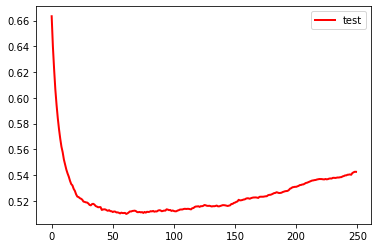

In [89]:
print(test_loss.max())
print(test_loss.min())
#%matplotlib inline
plt.figure()
plt.plot(test_loss, 'r', linewidth=2)
#plt.plot(y_pred, 'g', linewidth=2)
plt.legend(['test', 'train'])

In [91]:
clf = RandomForestClassifier(n_estimators=37, random_state=241)
clf.fit(X_train, y_train)
y_pred = clf.predict_proba(X_test)
log_loss(y_test, y_pred)

0.541655447528219